In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('df_creator.csv')

In [3]:
dup_df = df[df.duplicated()]
dup_df

,Unnamed: 0,id,photo,friends,is_starred,is_backing,permissions,urls,name,blurb,...,location,category,profile,spotlight,percent_funded,is_liked,is_disliked,fb,created,backed


Looks like no duplicate rows. I ran into duplicate rows when I was combining datasets. I decided not to use data from search options with projects that weren't funded because of the way Kickstarter removes unsuccessful projects. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 44 columns):
Unnamed: 0                  984 non-null int64
id                          984 non-null int64
photo                       984 non-null object
friends                     12 non-null object
is_starred                  12 non-null object
is_backing                  12 non-null object
permissions                 12 non-null object
urls                        984 non-null object
name                        984 non-null object
blurb                       984 non-null object
goal                        984 non-null float64
pledged                     984 non-null float64
state                       984 non-null object
slug                        984 non-null object
disable_communication       984 non-null bool
country                     984 non-null object
country_displayable_name    984 non-null object
currency                    984 non-null object
currency_symbol             984 non-n

In [5]:
df['staff_pick'].value_counts()

False    892
True      92
Name: staff_pick, dtype: int64

In [6]:
df['goal'].describe()

count       984.000000
mean      10668.155488
std       40061.054302
min           1.000000
25%         500.000000
50%        1500.000000
75%        7782.750000
max      650000.000000
Name: goal, dtype: float64

In [7]:
df['pledged'].describe()

count    9.840000e+02
mean     6.065499e+04
std      3.215350e+05
min      1.400000e+01
25%      1.630500e+03
50%      5.182500e+03
75%      2.058825e+04
max      7.221207e+06
Name: pledged, dtype: float64

In [8]:
df['percent_funded'].describe()

count       984.000000
mean       1048.474797
std        8412.718454
min           0.007662
25%         154.825923
50%         325.037500
75%         721.156250
max      257400.000000
Name: percent_funded, dtype: float64

In [9]:
df.iloc[205]

Unnamed: 0                                                                205
id                                                                 1449227709
photo                       {'key': 'assets/028/600/887/1a22cc71d56493a77d...
friends                                                                   NaN
is_starred                                                                NaN
is_backing                                                                NaN
permissions                                                               NaN
urls                        {'web': {'project': 'https://www.kickstarter.c...
name                        Norse Foundry: Dice of Crits Metal Crits One R...
blurb                       Criting every single time and twice on Sunday!...
goal                                                                        1
pledged                                                                  2574
state                                                           

In [10]:
 df['country'].value_counts()

US    600
GB    137
CA     53
ES     39
IT     27
AU     27
DE     21
FR     19
NL     14
NZ      8
MX      8
HK      8
SG      7
SE      6
DK      3
BE      2
AT      2
JP      2
IE      1
Name: country, dtype: int64

In [11]:
df['currency'].value_counts()

USD    600
GBP    137
EUR    125
CAD     53
AUD     27
NZD      8
MXN      8
HKD      8
SGD      7
SEK      6
DKK      3
JPY      2
Name: currency, dtype: int64

Looks like the above two are redundant. Probably better to use 'currency' just because there are fewer categories. Turns out, I probably should have binned maybe everything with fewer counts than CAD. I ended up not using this feature at all. 

In [12]:
df['launched_at'].head()

0    1586749960
1    1586736888
2    1586728954
3    1586717639
4    1586639816
Name: launched_at, dtype: int64

In [13]:
df['deadline'].head()

0    1589773960
1    1587946488
2    1588543354
3    1588445639
4    1591812000
Name: deadline, dtype: int64

The above two appear to be in "epoch" time where the time is in seconds from midnight UTC, Jan 1st, 1970. In the end, I ended up using the difference between these two to get the duration of the project. Kickstarter only allowed 200 pages to be searched which ended up being only a few months of data. If I had data going back over multiple years, then it may have been possible to look at how time affected a project's funding. 

In [14]:
df.iloc[1]['creator']

"{'id': 434622949, 'name': 'Nicholas Robinson', 'is_registered': None, 'chosen_currency': None, 'is_superbacker': None, 'avatar': {'thumb': 'https://ksr-ugc.imgix.net/assets/010/171/887/f995aa41058bdeb531d5e5c2bf482ab0_original.jpg?ixlib=rb-2.1.0&w=40&h=40&fit=crop&v=1461671654&auto=format&frame=1&q=92&s=dbde0db035d4504db5ad0c618a4fcce6', 'small': 'https://ksr-ugc.imgix.net/assets/010/171/887/f995aa41058bdeb531d5e5c2bf482ab0_original.jpg?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1461671654&auto=format&frame=1&q=92&s=b7df291009755065d40a55b2026475c1', 'medium': 'https://ksr-ugc.imgix.net/assets/010/171/887/f995aa41058bdeb531d5e5c2bf482ab0_original.jpg?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1461671654&auto=format&frame=1&q=92&s=b7df291009755065d40a55b2026475c1'}, 'urls': {'web': {'user': 'https://www.kickstarter.com/profile/434622949'}, 'api': {'user': 'https://api.kickstarter.com/v1/users/434622949?signature=1586842536.fd2344efac60f4831c05bbf1e66a0574b587d4b3'}}}"

In [15]:
 df.iloc[1]['category']

"{'id': 34, 'name': 'Tabletop Games', 'slug': 'games/tabletop games', 'position': 6, 'parent_id': 12, 'parent_name': 'Games', 'color': 51627, 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/games/tabletop%20games'}}}"

In [16]:
df.iloc[1]['profile']

"{'id': 3962348, 'project_id': 3962348, 'state': 'inactive', 'state_changed_at': 1585510981, 'name': None, 'blurb': None, 'background_color': None, 'text_color': None, 'link_background_color': None, 'link_text_color': None, 'link_text': None, 'link_url': None, 'show_feature_image': False, 'background_image_opacity': 0.8, 'should_show_feature_image_section': True, 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/028/705/669/4a448eef23613e5ea03361ef9463cee5_original.jpg?ixlib=rb-2.1.0&crop=faces&w=1552&h=873&fit=crop&v=1586709264&auto=format&frame=1&q=92&s=6f0d15af26e5cb15995d0733fdcfc793', 'baseball_card': 'https://ksr-ugc.imgix.net/assets/028/705/669/4a448eef23613e5ea03361ef9463cee5_original.jpg?ixlib=rb-2.1.0&crop=faces&w=560&h=315&fit=crop&v=1586709264&auto=format&frame=1&q=92&s=e152badc4c29298cfd161157051fc28b'}}}"

In [17]:
df['is_starrable'].value_counts()

False    796
True     188
Name: is_starrable, dtype: int64

In [18]:
df['backers_count'].describe()

count      984.000000
mean       760.080285
std       2812.978449
min          2.000000
25%         68.750000
50%        171.000000
75%        476.000000
max      50591.000000
Name: backers_count, dtype: float64

In [19]:
df['usd_pledged'].describe()

count    9.840000e+02
mean     5.455914e+04
std      3.106489e+05
min      2.678283e+00
25%      1.634250e+03
50%      4.998000e+03
75%      1.951875e+04
max      7.221207e+06
Name: usd_pledged, dtype: float64

In [20]:
df['converted_pledged_amount'].describe()

count    9.840000e+02
mean     5.435095e+04
std      3.103780e+05
min      2.000000e+00
25%      1.631250e+03
50%      4.998000e+03
75%      1.942125e+04
max      7.221207e+06
Name: converted_pledged_amount, dtype: float64

The three cells above have multicollinearity because they're all really describing the same thing. 

In [21]:
df['fx_rate'].head()

0    1.000000
1    1.000000
2    0.606800
3    1.093387
4    1.246830
Name: fx_rate, dtype: float64

In [22]:
df['fx_rate'].describe()

count    984.000000
mean       0.990667
std        0.205401
min        0.009254
25%        1.000000
50%        1.000000
75%        1.093387
max        1.246830
Name: fx_rate, dtype: float64

I'm still not sure what fx_rate is, so I ended up not using it.

In [23]:
df['current_currency'].value_counts()

USD    984
Name: current_currency, dtype: int64

The above wasn't useful as all rows had 'USD' as the value.

In [24]:
 df['spotlight'].value_counts()

True     779
False    205
Name: spotlight, dtype: int64

In [25]:
df['percent_funded'].describe()

count       984.000000
mean       1048.474797
std        8412.718454
min           0.007662
25%         154.825923
50%         325.037500
75%         721.156250
max      257400.000000
Name: percent_funded, dtype: float64

(array([982.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([7.66153846e-03, 2.57400069e+04, 5.14800061e+04, 7.72200054e+04,
        1.02960005e+05, 1.28700004e+05, 1.54440003e+05, 1.80180002e+05,
        2.05920002e+05, 2.31660001e+05, 2.57400000e+05]),
 <a list of 10 Patch objects>)

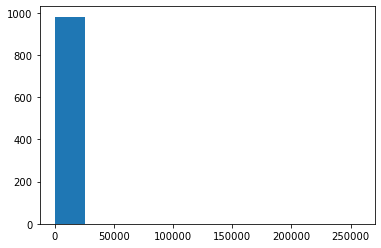

In [26]:
plt.hist(df['percent_funded'])

I ended up doing a log transform for the 'percent_funded'. There are values to the right that aren't showing up.

In [27]:
df['is_liked'].value_counts()

False    984
Name: is_liked, dtype: int64

In [28]:
df['is_disliked'].value_counts()

False    984
Name: is_disliked, dtype: int64

In [29]:
df['disable_communication'].value_counts()

False    984
Name: disable_communication, dtype: int64

Once again, the three above were not useful as they all had the same boolean value for all rows.

In [54]:
df['created'].describe()

count    984.000000
mean       5.082317
std        8.181955
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       56.000000
Name: created, dtype: float64

In [55]:
df['backed'].describe()

count    984.000000
mean      48.739837
std      101.427980
min        0.000000
25%        3.000000
50%       16.000000
75%       54.000000
max      898.000000
Name: backed, dtype: float64

In [56]:
df['fb'].describe()

count     984.000000
mean      357.320122
std       774.173892
min         0.000000
25%         0.000000
50%         0.000000
75%       372.250000
max      4998.000000
Name: fb, dtype: float64

In [10]:
df_100.iloc[0]

Unnamed: 0                                                                  0
id                                                                  746380653
photo                       {'key': 'assets/028/357/363/2327d019e352f0dcb1...
friends                                                                    []
is_starred                                                              False
is_backing                                                              False
permissions                                                                []
urls                        {'api': {'star': 'https://api.kickstarter.com/...
name                                              Kovaud's Adventurer's Guide
blurb                       A 5th edition supplement crammed full of tons ...
goal                                                                     5000
pledged                                                                    26
state                                                           

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'photo', 'friends', 'is_starred', 'is_backing',
       'permissions', 'urls', 'name', 'blurb', 'goal', 'pledged', 'state',
       'slug', 'disable_communication', 'country', 'country_displayable_name',
       'currency', 'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type',
       'creator', 'location', 'category', 'profile', 'spotlight',
       'percent_funded', 'is_liked', 'is_disliked'],
      dtype='object')

In [57]:
df_drop = df.drop(['Unnamed: 0', 'id', 'photo', 'friends', 'is_starred', 'is_backing', 
                   'permissions', 'urls', 'name', 'blurb', 'state', 'slug', 'disable_communication', 'country', 'country_displayable_name', 
                   'currency_symbol', 'currency_trailing_code', 'state_changed_at', 'created_at',  
                   'static_usd_rate', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type',  
                   'creator', 'location', 'category', 'profile', 'is_liked', 'is_disliked'], axis = 1)

Dropped a lot of columns that were not useful and/or relevant.

In [58]:
df_drop.columns

Index(['goal', 'pledged', 'currency', 'deadline', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'usd_pledged', 'spotlight',
       'percent_funded', 'fb', 'created', 'backed'],
      dtype='object')

In [59]:
df_drop['duration'] = (df_drop['deadline'] - df_drop['launched_at'])/(3600*24)

Created the 'duration' feature from two of the others.
One interesting recent development is that many board game kickstarter projects are significantly shorter than they used to be. 
The thought is that most of the money a project makes is during the first 48 hours and the last 48 hours. So there's no much reason to have a typical 30-day kickstarter. I suspect this will depend on the marketing that a project has.

In [60]:
df_drop.columns

Index(['goal', 'pledged', 'currency', 'deadline', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'usd_pledged', 'spotlight',
       'percent_funded', 'fb', 'created', 'backed', 'duration'],
      dtype='object')

In [61]:
df_drop.head()

,goal,pledged,currency,deadline,launched_at,staff_pick,is_starrable,backers_count,usd_pledged,spotlight,percent_funded,fb,created,backed,duration
0,5000.0,26.00,USD,1589773960,1586749960,False,True,2,26.000000,False,0.520000,0,0,0,35.000000
1,1300.0,161.00,USD,1587946488,1586736888,False,True,8,161.000000,False,12.384615,0,3,8,14.000000
2,29000.0,9434.42,NZD,1588543354,1586728954,False,True,242,5739.899335,False,32.532483,150,0,4,21.000000
3,3000.0,3363.00,EUR,1588445639,1586717639,False,True,48,3677.608347,False,112.100000,400,2,0,20.000000
4,2000.0,44.00,GBP,1591812000,1586639816,False,True,6,54.841371,False,2.200000,0,2,0,59.863241


In [62]:
df_plot = df_drop.drop(['staff_pick', 'is_starrable', 'spotlight'], axis = 1)

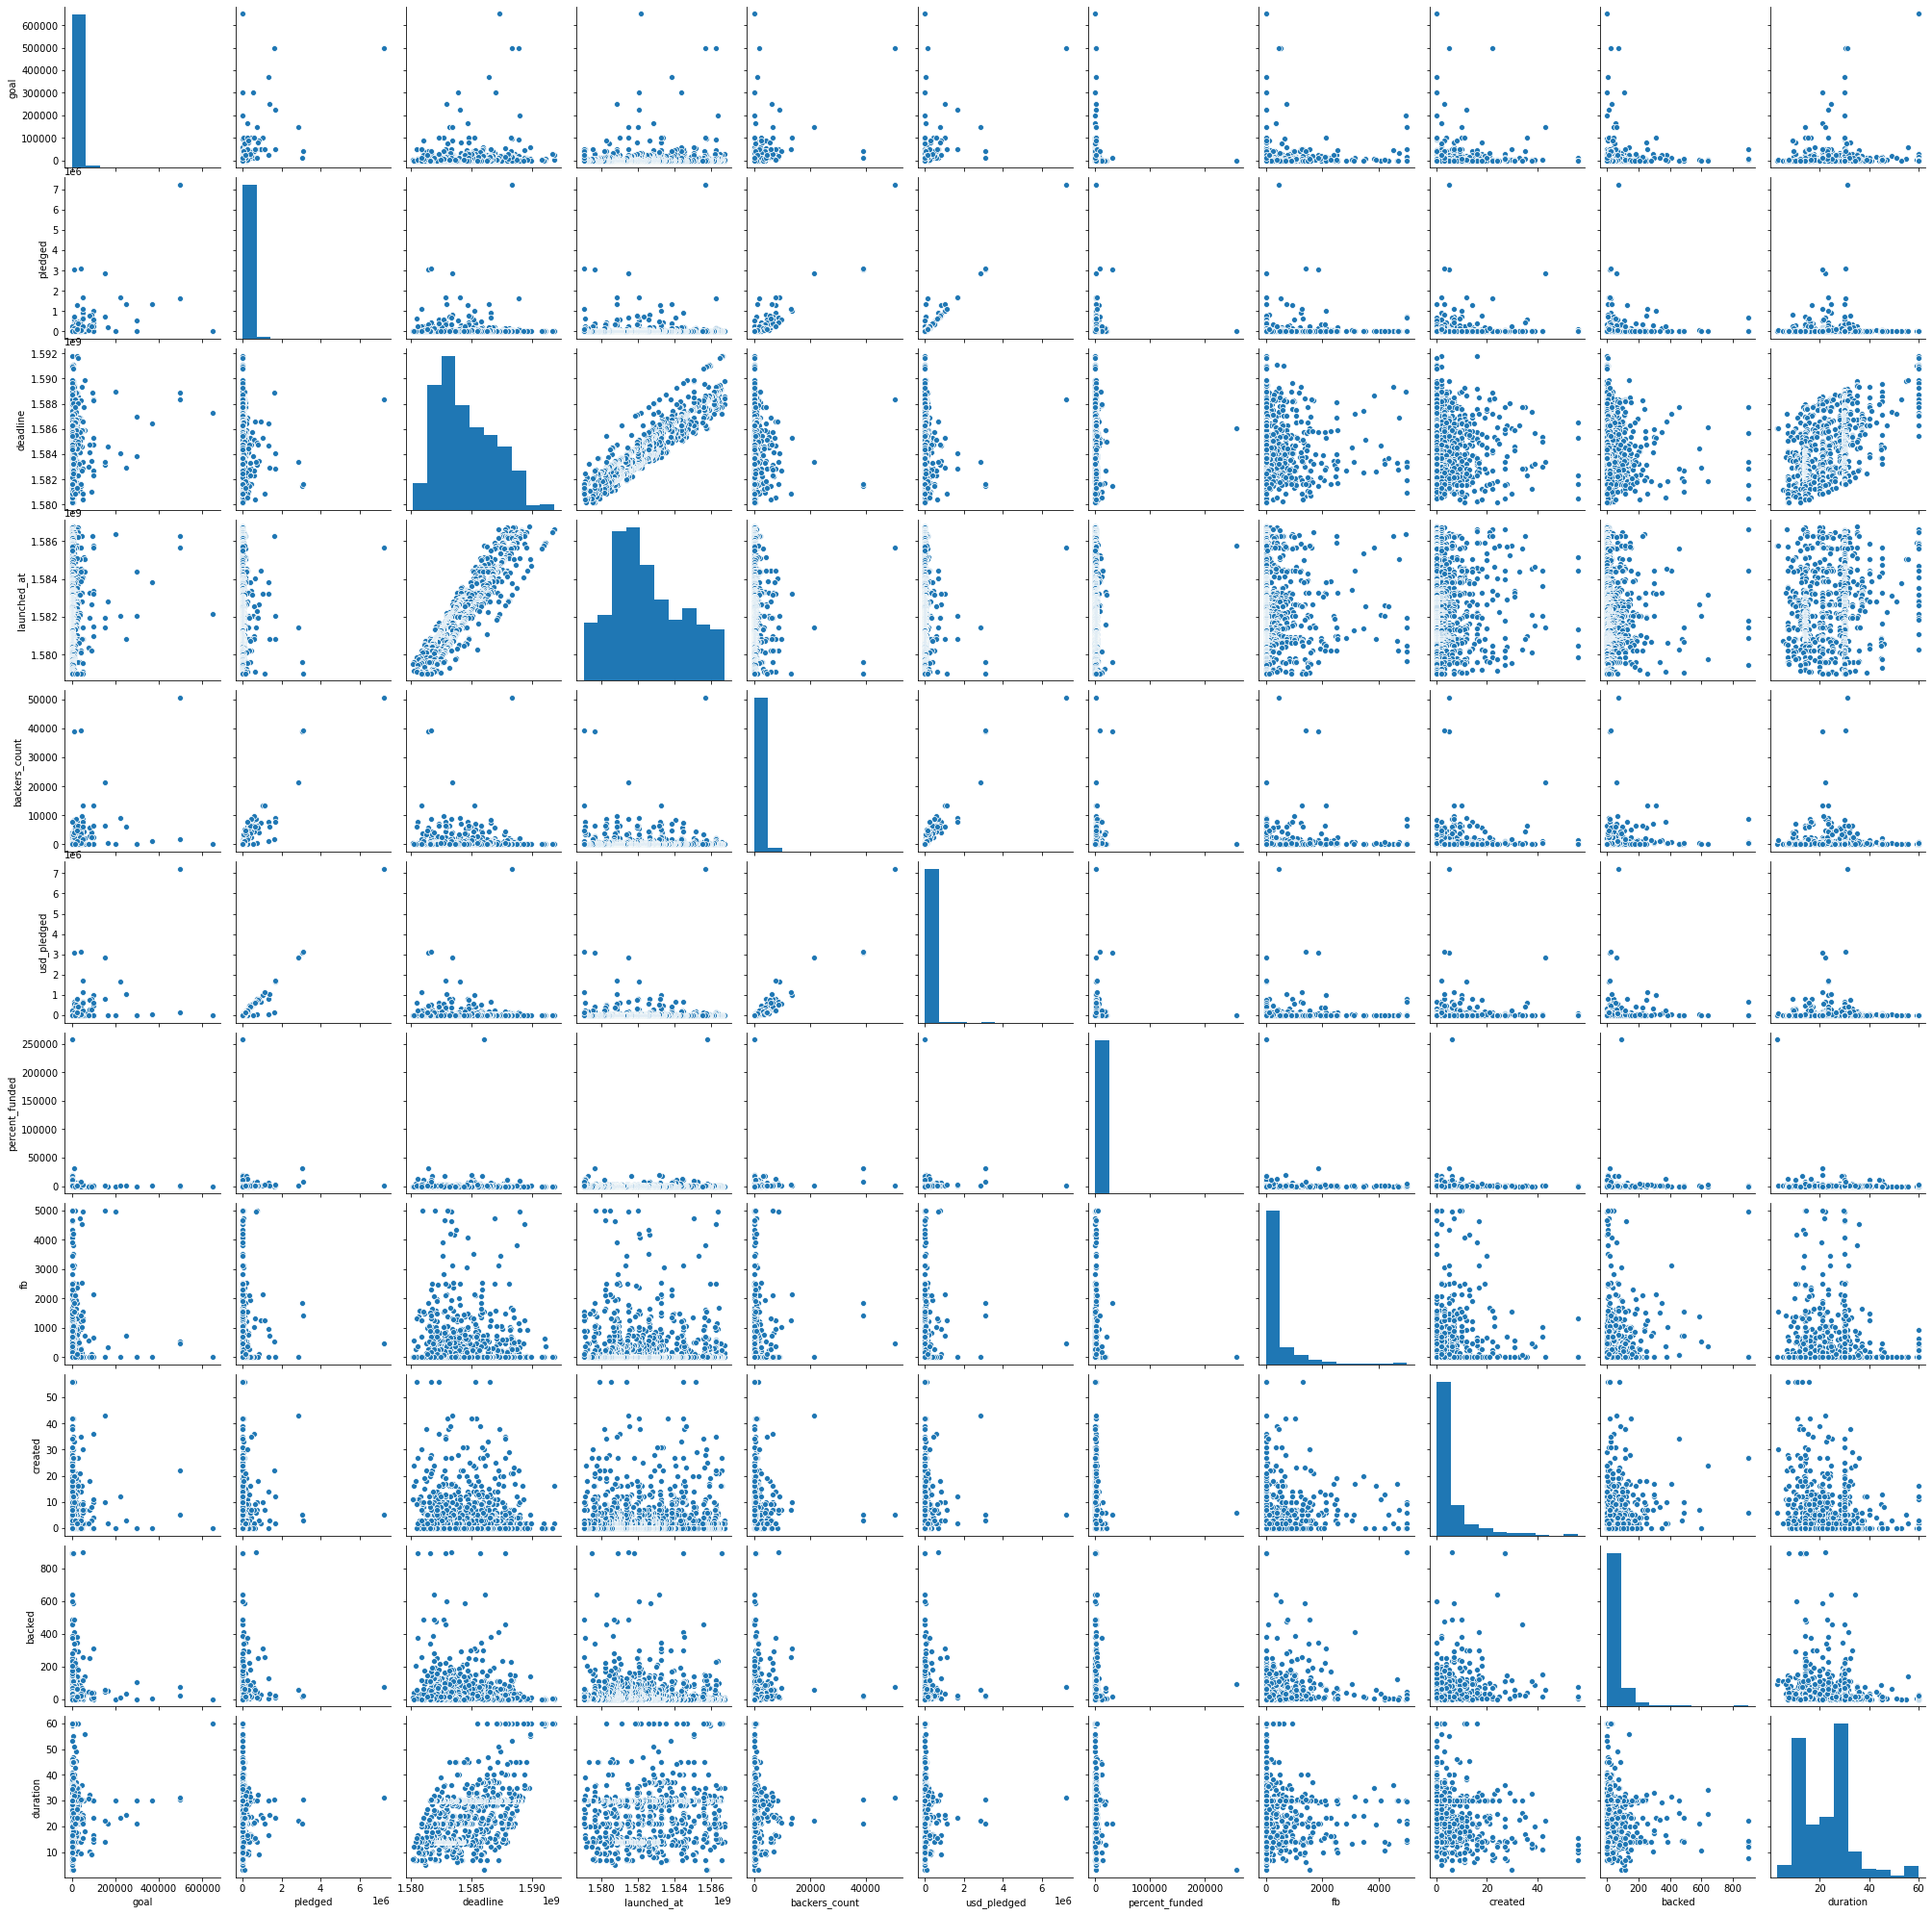

In [63]:
df_pairplot = sns.pairplot(df_plot)

Lots of data needs to be transformed based on the pairplot above. Specifically, it looks like a lot of the data would benefit from log transforms.

In [64]:
df_pairplot.savefig("pairplot_15Apr.png", dpi=300)

In [65]:
df_drop = df_drop.drop(['pledged', 'deadline'], axis = 1)

In [67]:
df_drop = df_drop.drop(['usd_pledged'], axis = 1)

In [68]:
df_drop.columns

Index(['goal', 'currency', 'launched_at', 'staff_pick', 'is_starrable',
       'backers_count', 'spotlight', 'percent_funded', 'fb', 'created',
       'backed', 'duration'],
      dtype='object')

In [70]:
df_plot = df_drop.drop(['staff_pick', 'is_starrable', 'spotlight'], axis = 1)

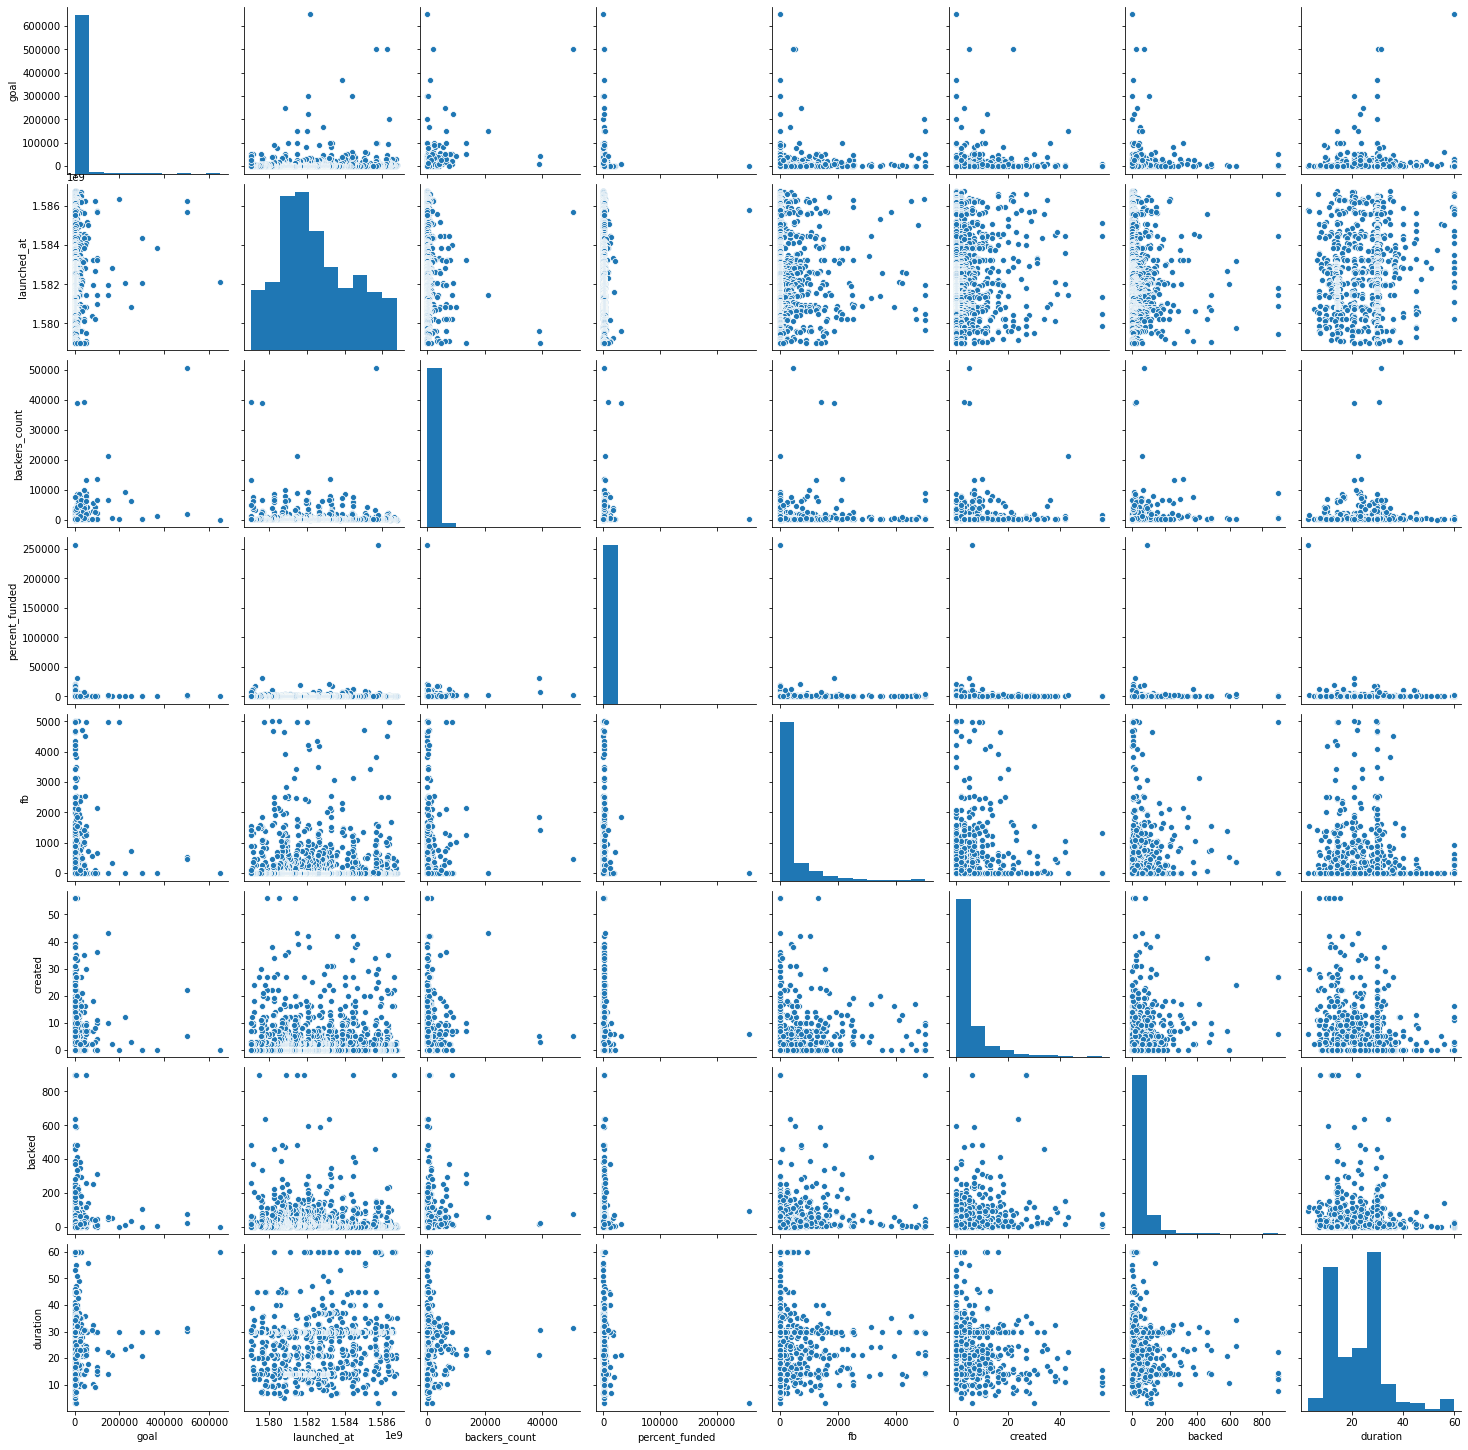

In [71]:
df_pairplot = sns.pairplot(df_plot)

In [72]:
df_pairplot.savefig("pairplot_2_15Apr.png", dpi=300)

In [44]:
df_plot.columns

Index(['goal', 'currency', 'launched_at', 'backers_count', 'usd_pledged',
       'percent_funded', 'duration'],
      dtype='object')

In [45]:
df_drop.columns

Index(['goal', 'currency', 'launched_at', 'staff_pick', 'is_starrable',
       'backers_count', 'usd_pledged', 'spotlight', 'percent_funded',
       'duration'],
      dtype='object')

In [46]:
df_drop['currency'].value_counts()

USD    600
GBP    137
EUR    125
CAD     53
AUD     27
HKD      8
NZD      8
MXN      8
SGD      7
SEK      6
DKK      3
JPY      2
Name: currency, dtype: int64

In [47]:
df_drop.head()

,goal,currency,launched_at,staff_pick,is_starrable,backers_count,usd_pledged,spotlight,percent_funded,duration
0,5000.0,USD,1586749960,False,True,2,26.000000,False,0.520000,35.000000
1,1300.0,USD,1586736888,False,True,8,161.000000,False,12.384615,14.000000
2,29000.0,NZD,1586728954,False,True,242,5739.899335,False,32.532483,21.000000
3,3000.0,EUR,1586717639,False,True,48,3677.608347,False,112.100000,20.000000
4,2000.0,GBP,1586639816,False,True,6,54.841371,False,2.200000,59.863241


In [73]:
df_drop.to_csv('df_clean_15Apr.csv', index=False)

In [76]:
df_16 = pd.read_csv('df_funded_16Apr.csv')

In [77]:
df_16.head()

,goal,currency,launched_at,staff_pick,is_starrable,backers_count,spotlight,percent_funded,fb,created,backed,duration,log_per_fund
0,3000.0,EUR,1586717639,False,True,48,False,112.1,400,2,0,20.000000,4.719391
1,3000.0,USD,1586604501,False,True,842,False,234.6,0,27,896,13.398368,5.457882
2,100.0,GBP,1586599529,False,True,18,False,167.0,255,22,3,6.787859,5.117994
3,500.0,USD,1586541615,False,True,64,False,246.6,0,0,0,30.000000,5.507768
4,500.0,GBP,1586520314,False,True,44,False,375.4,0,16,12,30.995671,5.927992


In [81]:
df_16['goal'].sort_values(ascending=False).head(20)

18     500000.0
46     500000.0
192    369000.0
421    300000.0
679    250000.0
426    225000.0
296    166000.0
456    150000.0
538    150000.0
219    100000.0
617    100000.0
249    100000.0
535    100000.0
15      93025.0
334     90000.0
788     90000.0
458     80000.0
237     80000.0
777     77000.0
157     60000.0
Name: goal, dtype: float64

In [82]:
df_16['goal'].sort_values(ascending=True).head(20)

155     10.0
43      10.0
111     17.0
820     20.0
156     20.0
169     20.0
56      40.0
326     40.0
776     50.0
39      50.0
37      50.0
533     50.0
279     60.0
836     80.0
889     85.0
257     99.0
437     99.0
599     99.0
160    100.0
136    100.0
Name: goal, dtype: float64

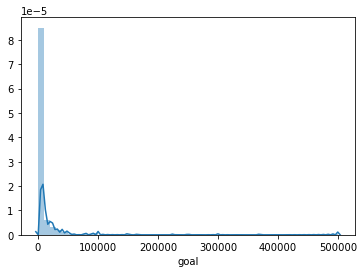

In [79]:
sns.distplot(df_16['goal'], kde=True)

The 3 cells above show that the funding goal is highly skewed. Hence the log transformation below.

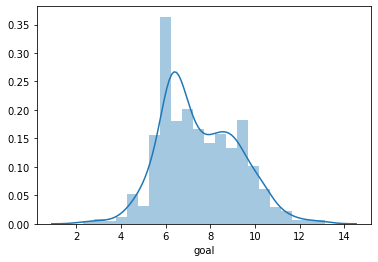

In [83]:
sns.distplot(np.log(df_16['goal']), kde=True)

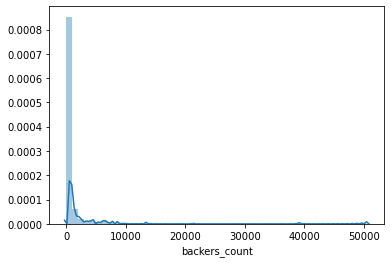

In [84]:
sns.distplot(df_16['backers_count'], kde=True)

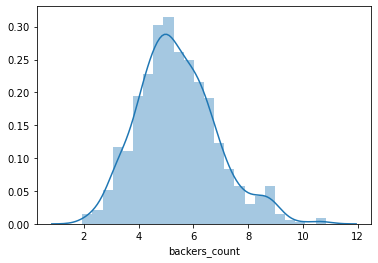

In [86]:
sns.distplot(np.log(df_16['backers_count']), kde=True)

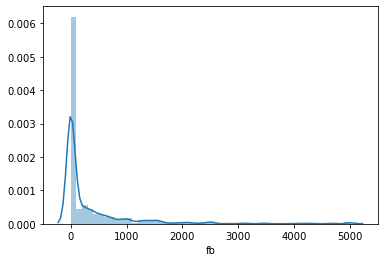

In [87]:
sns.distplot(df_16['fb'], kde=True)

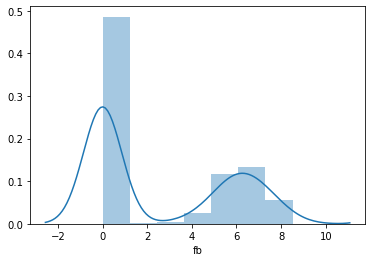

In [89]:
sns.distplot(np.log(df_16['fb']+1), kde=True)

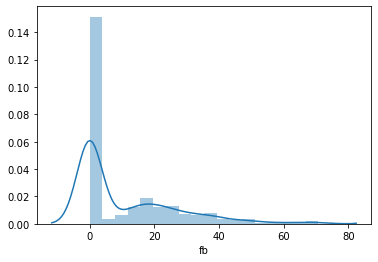

In [93]:
sns.distplot(np.sqrt(df_16['fb']), kde=True)

In [94]:
test_box = df_16['fb']+1

In [95]:
test_box.head()

0    401
1      1
2    256
3      1
4      1
Name: fb, dtype: int64

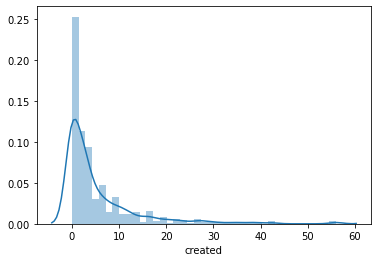

In [98]:
sns.distplot(df_16['created'], kde=True)

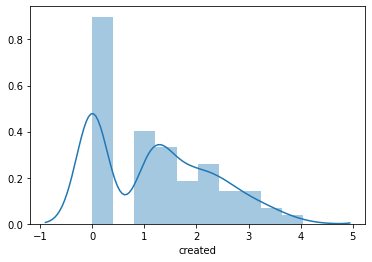

In [99]:
sns.distplot(np.log(df_16['created']+1), kde=True)

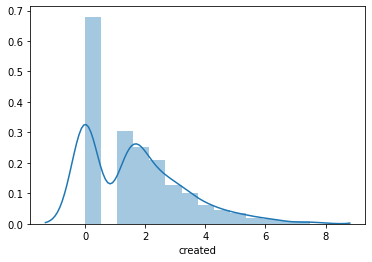

In [100]:
sns.distplot(np.sqrt(df_16['created']), kde=True)

I had a problem with several features that had a lot of values that were zero. Simple log transforms didn't appear to capture the data very well. I waited too long to ask about this. Joan suggested binning the zero data. I didn't get a chance to try this out.

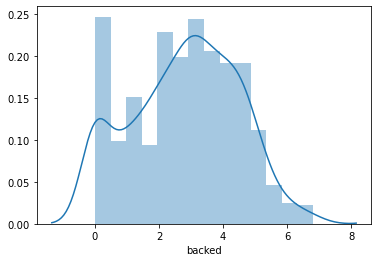

In [109]:
sns.distplot(np.log(df_16['backed']+1), kde=True)

In [110]:
df_16 = df_16.assign(log_goal = lambda x: np.log(x.goal))

In [112]:
df_16 = df_16.assign(log_backers = lambda x: np.log(x.backers_count))

In [113]:
df_16 = df_16.assign(log_fb = lambda x: np.log(x.fb +1))

In [116]:
df_16 = df_16.assign(log_created = lambda x: np.log(x.created +1))

In [117]:
df_16 = df_16.assign(log_backed = lambda x: np.log(x.backed +1))

In [118]:
df_16.head()

,goal,currency,launched_at,staff_pick,is_starrable,backers_count,spotlight,percent_funded,fb,created,backed,duration,log_per_fund,log_goal,log_backers,log_fb,log_created,log_backed
0,3000.0,EUR,1586717639,False,True,48,False,112.1,400,2,0,20.000000,4.719391,8.006368,3.871201,5.993961,1.098612,0.000000
1,3000.0,USD,1586604501,False,True,842,False,234.6,0,27,896,13.398368,5.457882,8.006368,6.735780,0.000000,3.332205,6.799056
2,100.0,GBP,1586599529,False,True,18,False,167.0,255,22,3,6.787859,5.117994,4.605170,2.890372,5.545177,3.135494,1.386294
3,500.0,USD,1586541615,False,True,64,False,246.6,0,0,0,30.000000,5.507768,6.214608,4.158883,0.000000,0.000000,0.000000
4,500.0,GBP,1586520314,False,True,44,False,375.4,0,16,12,30.995671,5.927992,6.214608,3.784190,0.000000,2.833213,2.564949


In [119]:
df_log = df_16.drop(['goal', 'backers_count', 'fb', 'created', 'backed'], axis=1)

In [120]:
df_log.head()

,currency,launched_at,staff_pick,is_starrable,spotlight,percent_funded,duration,log_per_fund,log_goal,log_backers,log_fb,log_created,log_backed
0,EUR,1586717639,False,True,False,112.1,20.000000,4.719391,8.006368,3.871201,5.993961,1.098612,0.000000
1,USD,1586604501,False,True,False,234.6,13.398368,5.457882,8.006368,6.735780,0.000000,3.332205,6.799056
2,GBP,1586599529,False,True,False,167.0,6.787859,5.117994,4.605170,2.890372,5.545177,3.135494,1.386294
3,USD,1586541615,False,True,False,246.6,30.000000,5.507768,6.214608,4.158883,0.000000,0.000000,0.000000
4,GBP,1586520314,False,True,False,375.4,30.995671,5.927992,6.214608,3.784190,0.000000,2.833213,2.564949


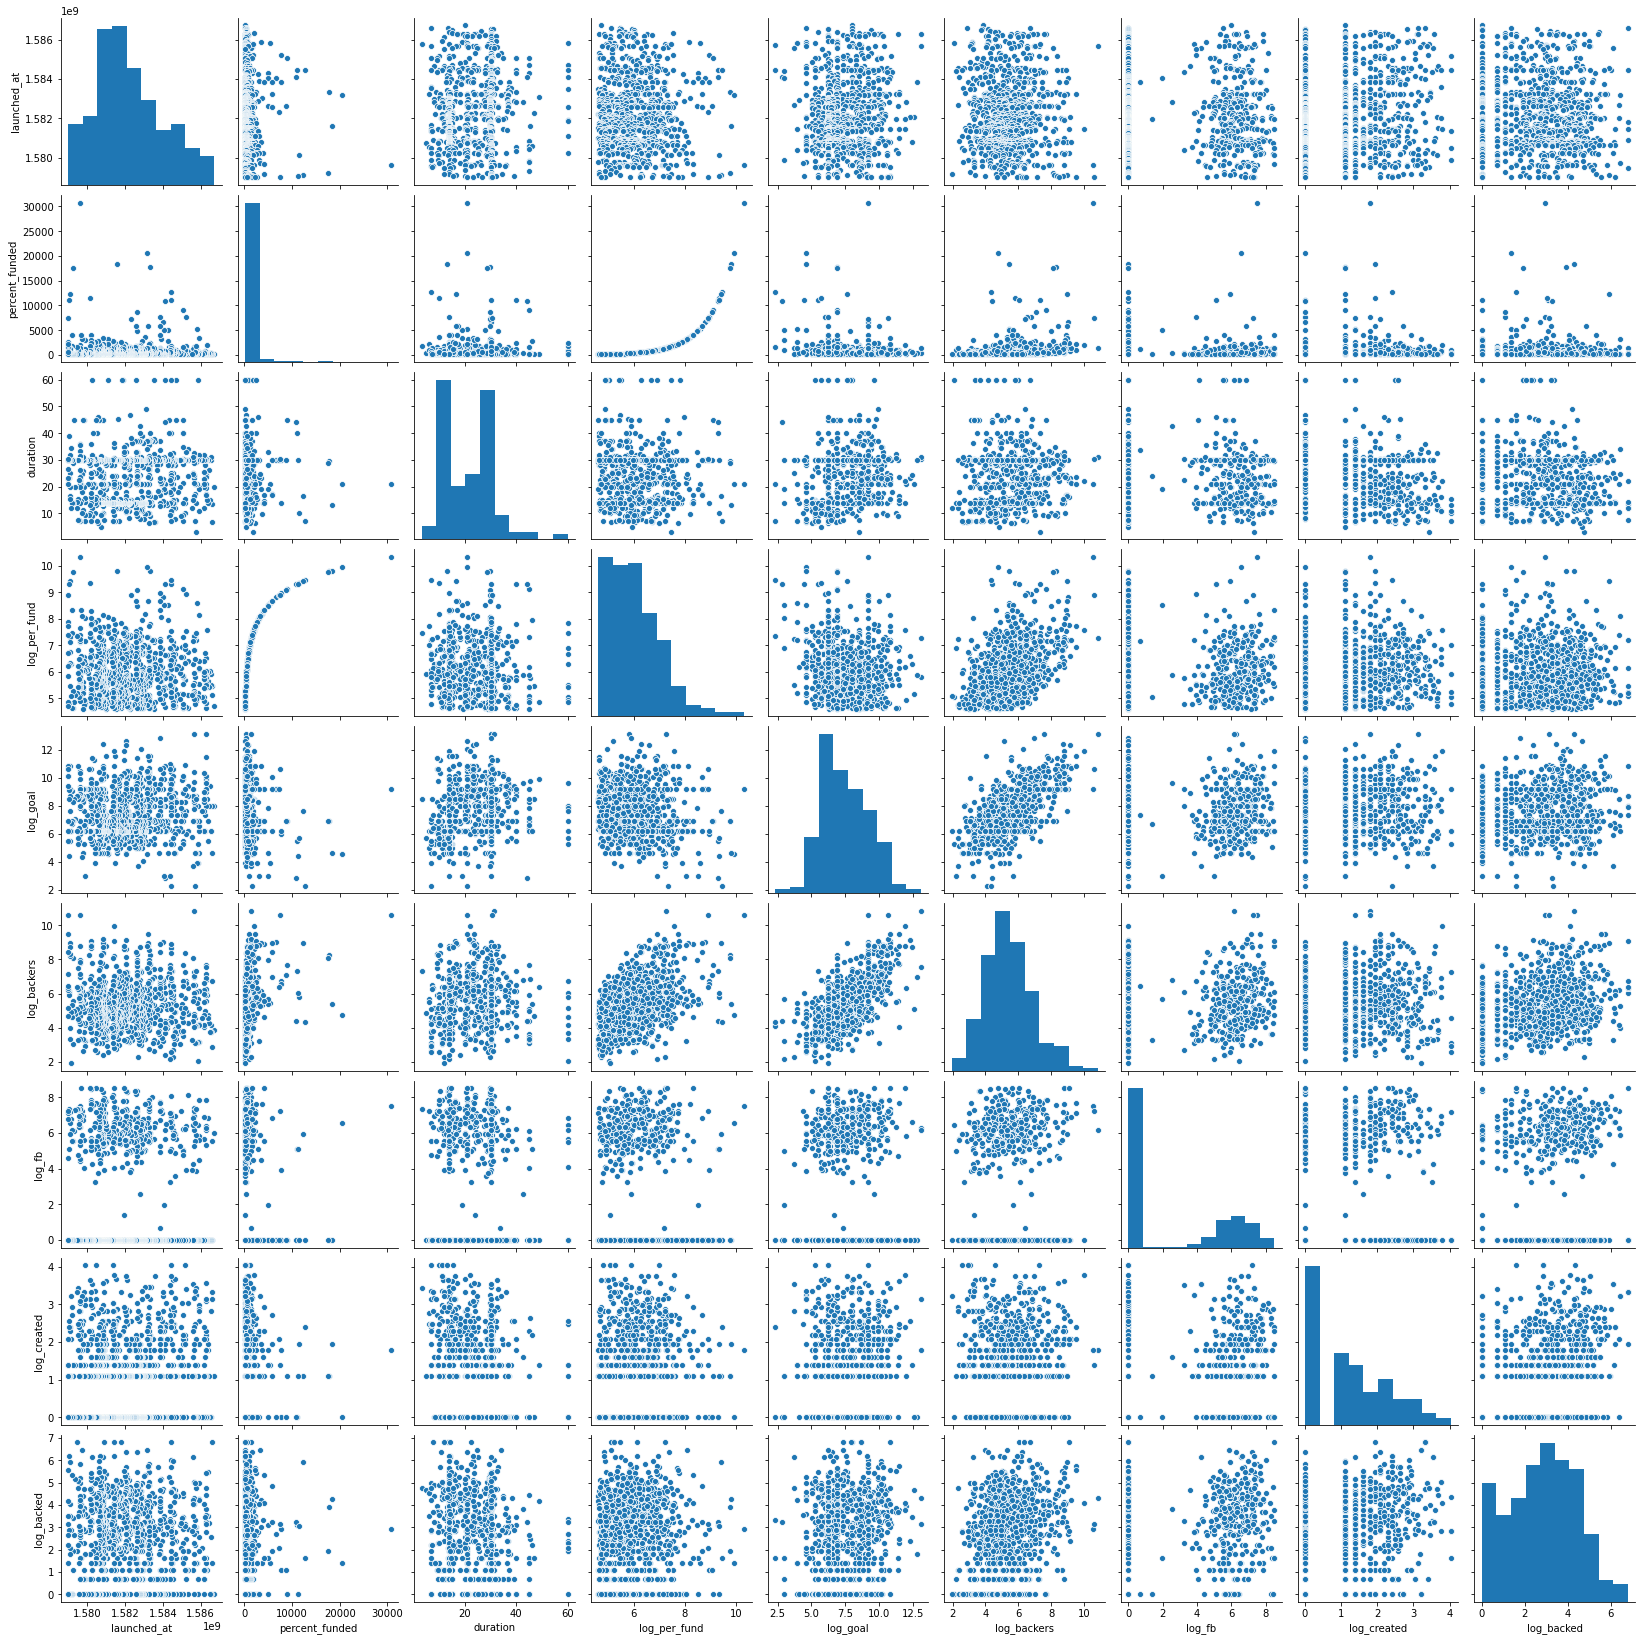

In [125]:
pair_log = sns.pairplot(df_log.drop(['staff_pick', 'is_starrable', 'spotlight'], axis=1))

In [126]:
pair_log.savefig("pair_log.png", dpi=300)

In [121]:
df_log.to_csv('df_log.csv', index=False)

In [127]:
df_log.head()

,currency,launched_at,staff_pick,is_starrable,spotlight,percent_funded,duration,log_per_fund,log_goal,log_backers,log_fb,log_created,log_backed
0,EUR,1586717639,False,True,False,112.1,20.000000,4.719391,8.006368,3.871201,5.993961,1.098612,0.000000
1,USD,1586604501,False,True,False,234.6,13.398368,5.457882,8.006368,6.735780,0.000000,3.332205,6.799056
2,GBP,1586599529,False,True,False,167.0,6.787859,5.117994,4.605170,2.890372,5.545177,3.135494,1.386294
3,USD,1586541615,False,True,False,246.6,30.000000,5.507768,6.214608,4.158883,0.000000,0.000000,0.000000
4,GBP,1586520314,False,True,False,375.4,30.995671,5.927992,6.214608,3.784190,0.000000,2.833213,2.564949


In [128]:
df_log_2 = df_log.drop(['launched_at', 'percent_funded'], axis=1)

In [129]:
df_log_2.head()

,currency,staff_pick,is_starrable,spotlight,duration,log_per_fund,log_goal,log_backers,log_fb,log_created,log_backed
0,EUR,False,True,False,20.000000,4.719391,8.006368,3.871201,5.993961,1.098612,0.000000
1,USD,False,True,False,13.398368,5.457882,8.006368,6.735780,0.000000,3.332205,6.799056
2,GBP,False,True,False,6.787859,5.117994,4.605170,2.890372,5.545177,3.135494,1.386294
3,USD,False,True,False,30.000000,5.507768,6.214608,4.158883,0.000000,0.000000,0.000000
4,GBP,False,True,False,30.995671,5.927992,6.214608,3.784190,0.000000,2.833213,2.564949


In [130]:
df_log_2.shape

(900, 11)

In [131]:
df_log_2['currency'].value_counts()

USD    554
GBP    126
EUR    116
CAD     49
AUD     23
HKD      6
SGD      6
MXN      6
NZD      5
SEK      5
JPY      2
DKK      2
Name: currency, dtype: int64

In [132]:
cur_counts = df_log_2['currency'].value_counts()

In [135]:
cur_counts[cur_counts>25].index

Index(['USD', 'GBP', 'EUR', 'CAD'], dtype='object')

In [139]:
df_log_2 = df_log_2[df_log_2['currency'].isin(cur_counts[cur_counts>25].index)]

In [140]:
df_log_2.to_csv('df_log_2.csv', index=False)